In [1]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

Using TensorFlow backend.


In [2]:
# 此函數會幫我們把多張影像畫成一張多宮格圖
def img_combine(img, ncols=8, size=1, path=False):
    from math import ceil
    import matplotlib.pyplot as plt
    import numpy as np
    nimg = len(img)
    nrows = int(ceil(nimg/ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(ncols*size,nrows*size))
    if nrows == 0:
        return
    elif ncols == 1:
        for r, ax in zip(np.arange(nrows), axes):
            nth=r
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
                
            ax.set_axis_off()
    elif nrows == 1:
        for c, ax in zip(np.arange(ncols), axes):
            nth=c
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
            ax.set_axis_off()
    else:
        for r, row in zip(np.arange(nrows), axes):
            for c, ax in zip(np.arange(ncols), row):
                nth=r*ncols+c
                if nth < nimg:
                    ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
                ax.set_axis_off()
    plt.show()

In [3]:
# 讀取 Cifar-10 資料集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

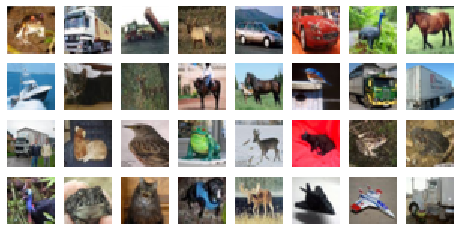

In [4]:
# 取前 32 張圖片做視覺化
images = x_train[:32]
img_combine(images)

In [5]:
# 建立 ImageDataGenerator，並指定我們要做資料增強的數值範圍
data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

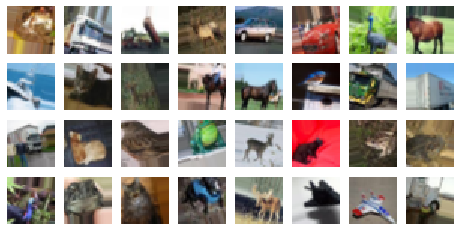

In [6]:
# 注意！！ ImageDataGenerator 是一個 Generator (生成器)! 對 Generator 不熟悉的同學請回到 Day098 做複習。
# 使用 .flow 後，就會對我們的影像進行增強，再 call next 取出 generator 的圖像。(shuffle=False 因為我們希望圖像的順序不要改變，方便觀察。實際訓練時預設是 shuffle=True) 
augmented_iamges = next(data_generator.flow(images, shuffle=False))
img_combine(augmented_iamges.astype("int")) # 注意在訓練時神經網路時，圖像資料必須要是 float32，但在做視覺化時要轉為 int 才能順利畫圖。所以為了畫圖才把資料轉為 int

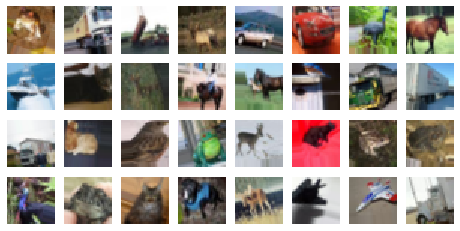

In [7]:
# 因為隨機性的關係，所以一樣的圖像再經過一次 generator 後的結果不一定相同
augmented_iamges = next(data_generator.flow(images, shuffle=False))
img_combine(augmented_iamges.astype("int"))

## 作業

請使用 ImageDataGenerator 來進行 Cifar-10 資料集的訓練，並觀察不同的圖像增強方法是否會顯著影響訓練結果

In [8]:
import keras
from keras.datasets import cifar10
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
BATCH_SIZE = 128
EPOCHS = 25
num_class = 10

y_train = keras.utils.to_categorical(y_train, num_class)
y_test = keras.utils.to_categorical(y_test, num_class)

In [22]:
def build_model():
    keras.backend.clear_session()
    model = keras.Sequential()
    model.add(Conv2D(32, (3,3), padding='SAME', input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(num_class))
    model.add(Activation('softmax'))
    return model
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)       

In [10]:
from keras.preprocessing.image import ImageDataGenerator
data_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [11]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
model.fit_generator(data_gen.flow(x_train, y_train, batch_size=BATCH_SIZE), steps_per_epoch=int(len(x_train)/BATCH_SIZE), epochs=EPOCHS, validation_data=(x_test, y_test), verbose=1)

Epoch 1/25
390/390 [==============================] - 29s 75ms/step - loss: 2.6411 - accuracy: 0.1971 - val_loss: 1.8591 - val_accuracy: 0.3073
Epoch 2/25
390/390 [==============================] - 26s 68ms/step - loss: 1.8282 - accuracy: 0.3093 - val_loss: 1.5693 - val_accuracy: 0.4187
Epoch 3/25
390/390 [==============================] - 26s 68ms/step - loss: 1.6762 - accuracy: 0.3752 - val_loss: 1.5230 - val_accuracy: 0.4289
Epoch 4/25
390/390 [==============================] - 28s 72ms/step - loss: 1.5700 - accuracy: 0.4227 - val_loss: 1.5466 - val_accuracy: 0.4366
Epoch 5/25
390/390 [==============================] - 30s 76ms/step - loss: 1.4917 - accuracy: 0.4566 - val_loss: 1.2556 - val_accuracy: 0.5562
Epoch 6/25
390/390 [==============================] - 31s 79ms/step - loss: 1.4222 - accuracy: 0.4840 - val_loss: 1.3357 - val_accuracy: 0.5177
Epoch 7/25
390/390 [==============================] - 34s 86ms/step - loss: 1.3753 - accuracy: 0.5048 - val_loss: 1.2097 - val_accuracy:

In [12]:
score = model.evaluate(x_test, y_test)
print('loss: ', score[0])
print('accuracy: ', score[1])

10000/10000 [==============================] - 2s 193us/step
loss:  0.9359038004875183
accuracy:  0.6761000156402588


In [24]:

def cifar_generator(img_array, label_array, num_class=10, batch_size=32):
    while True:
        for indexs in range(0, len(img_array), batch_size):
            images = img_array[indexs: indexs+batch_size]
            labels = label_array[indexs: indexs+batch_size]
            
            images = images.astype('float32')
            images = images / 255.
            labels = keras.utils.to_categorical(labels, num_class)
            
            yield images, labels

In [29]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
cifar_gen = cifar_generator(x_train, y_train)

x_test = x_test.astype('float32')
x_test = x_test / 255.
y_test = keras.utils.to_categorical(y_test, num_class)

In [30]:
model = build_model()
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
model.fit_generator(cifar_gen, steps_per_epoch=int(len(x_train)/BATCH_SIZE), epochs=EPOCHS, validation_data=(x_test, y_test), verbose=1)


Epoch 1/25
390/390 [==============================] - 8s 20ms/step - loss: 1.8264 - accuracy: 0.3240 - val_loss: 1.5265 - val_accuracy: 0.4341
Epoch 2/25
390/390 [==============================] - 7s 19ms/step - loss: 1.4903 - accuracy: 0.4514 - val_loss: 1.3669 - val_accuracy: 0.5055
Epoch 3/25
390/390 [==============================] - 7s 19ms/step - loss: 1.3683 - accuracy: 0.5011 - val_loss: 1.3230 - val_accuracy: 0.5164
Epoch 4/25
390/390 [==============================] - 7s 19ms/step - loss: 1.2901 - accuracy: 0.5341 - val_loss: 1.1487 - val_accuracy: 0.5900
Epoch 5/25
390/390 [==============================] - 7s 19ms/step - loss: 1.2037 - accuracy: 0.5707 - val_loss: 1.1615 - val_accuracy: 0.5861
Epoch 6/25
390/390 [==============================] - 7s 19ms/step - loss: 1.1443 - accuracy: 0.5962 - val_loss: 1.1013 - val_accuracy: 0.6203
Epoch 7/25
390/390 [==============================] - 8s 20ms/step - loss: 1.0777 - accuracy: 0.6164 - val_loss: 1.0668 - val_accuracy: 0.6204

In [31]:
score2 = model.evaluate(x_test, y_test)

print('[with data augmentation]')
print('loss: ', score[0])
print('accuracy: ', score[1])

print('[default]')
print('loss: ', score2[0])
print('accuracy: ', score2[1])

10000/10000 [==============================] - 2s 169us/step
[with data augmentation]
loss:  0.9359038004875183
accuracy:  0.6761000156402588
[default]
loss:  0.7536957150459289
accuracy:  0.7409999966621399
